https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
from google.colab import output
#Install Keras-tuner on first run.
!pip install keras-tuner
# install the ydata-profiling package
!pip install ydata-profiling
#Mount google drive on first run
from google.colab import drive
drive.mount('/content/drive')
#Clear cell output
output.clear() #Clears output after installing packages. Hide if any issues.

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Import and read the charity_data.csv.
url = "drive/MyDrive/BootCamp/project_4/Resources/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)

#Import python auto EDA
# load the ydata_profiling package
from ydata_profiling import ProfileReport

#drop id column
df = df.drop(columns=['id'])



In [5]:
#preliminary changes to format categorical columns and drop id.
#create backup of original df
df_backup = df.copy()
# List of feature names to convert to categorical
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status', 'stroke', 'work_type', 'Residence_type']

# Convert the selected features to categorical
df[categorical_features] = df[categorical_features].astype('category')



#Create AutoEDA report

In [6]:
# use ProfileReport
pr_df = ProfileReport(df)
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Cleaning Data

In [7]:
#Check to see how many values are NaN in BMI and if it disproportonatley affects stroke records
bmi_nan_df = df[df['bmi'].isna()]
bmi_nan_df

# Count the number of rows where 'stroke' is 1
stroke_1_count = bmi_nan_df['stroke'].eq(1).sum()

# Calculate the percentage
percentage_with_stroke_1 = (stroke_1_count / len(bmi_nan_df)) * 100

print(f'Total rows with stroke = 1 and bmi = NaN: {stroke_1_count}')
print(f"Percentage of rows with 'stroke' = 1 in filtered_df: {percentage_with_stroke_1:.2f}%")

# Count the number of rows where 'stroke' is 1 in the original DataFrame
stroke_1_count_original = df['stroke'].eq(1).sum()

# Calculate the percentage
percentage_with_stroke_1_original = (stroke_1_count_original / len(df)) * 100

print(f"Percentage of rows with 'stroke' = 1 in the original df: {percentage_with_stroke_1_original:.2f}%")

Total rows with stroke = 1 and bmi = NaN: 40
Percentage of rows with 'stroke' = 1 in filtered_df: 19.90%
Percentage of rows with 'stroke' = 1 in the original df: 4.87%


Records for stroke sufferers seem to be disproprotionately represented in rows missing bmi. This will need to be dealt with some how.

In [8]:
#No duplicated columns founr
df.duplicated().sum()

0

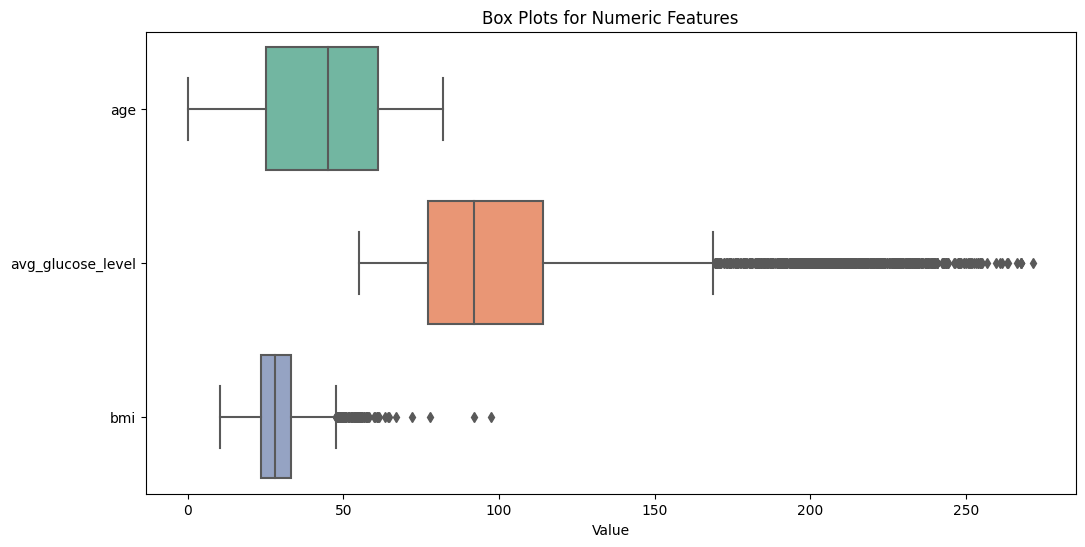

In [9]:
# Filter only the numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Create box plots for all numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title("Box Plots for Numeric Features")
plt.xlabel("Value")
plt.show()

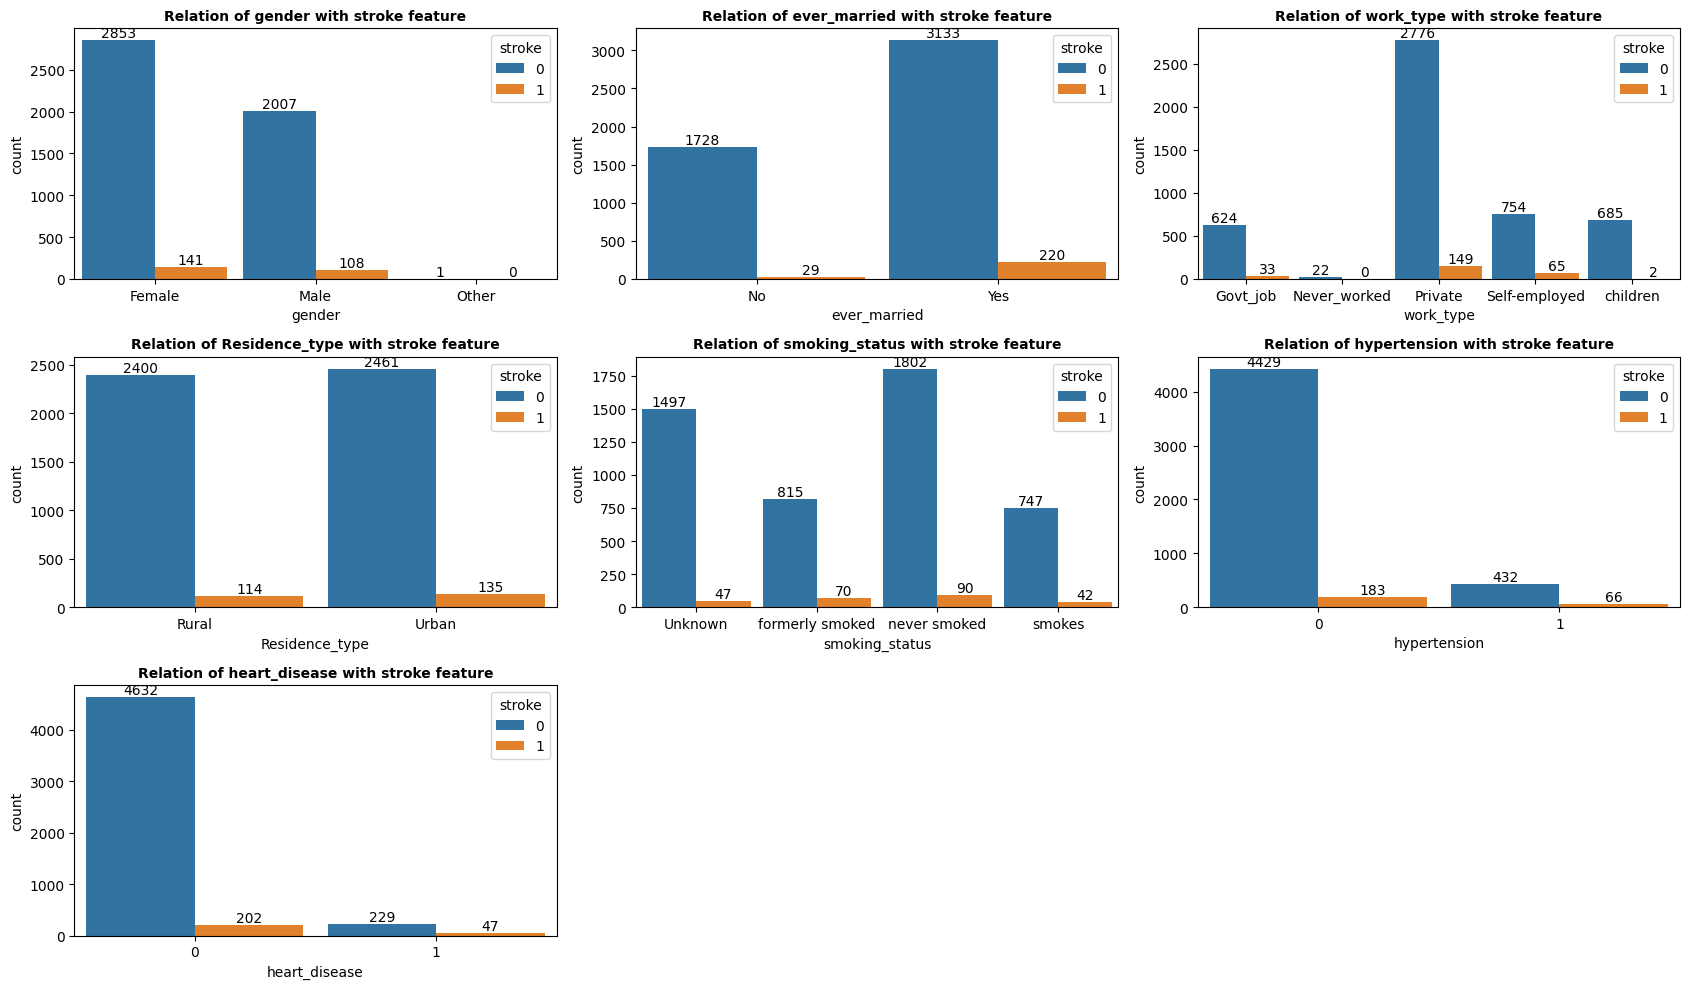

In [10]:
column_list=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension','heart_disease']

plt.figure(figsize=(17,10))
for i, cols in enumerate(column_list):
  plt.subplot(3,3,i+1)
  ax=sns.countplot(data=df, x=cols ,hue="stroke", width=0.9)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.title(f"Relation of {cols} with stroke feature", size=10, fontweight="black")
plt.tight_layout()
plt.show()

<ipython-input-11-25578b1ba9bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_backup.corr()


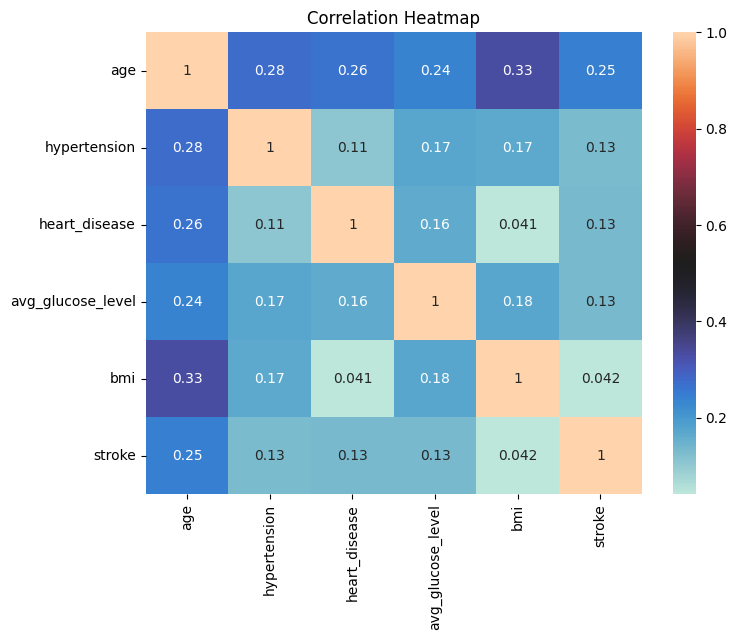

In [11]:
# Calculate the correlation matrix
corr = df_backup.corr()

# Specify a different color scheme (e.g., 'coolwarm')
cmap = 'icefire'

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=cmap)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-12-ca6e742a15ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rel_stroke = df_backup.corr()["stroke"].sort_values(ascending=False)


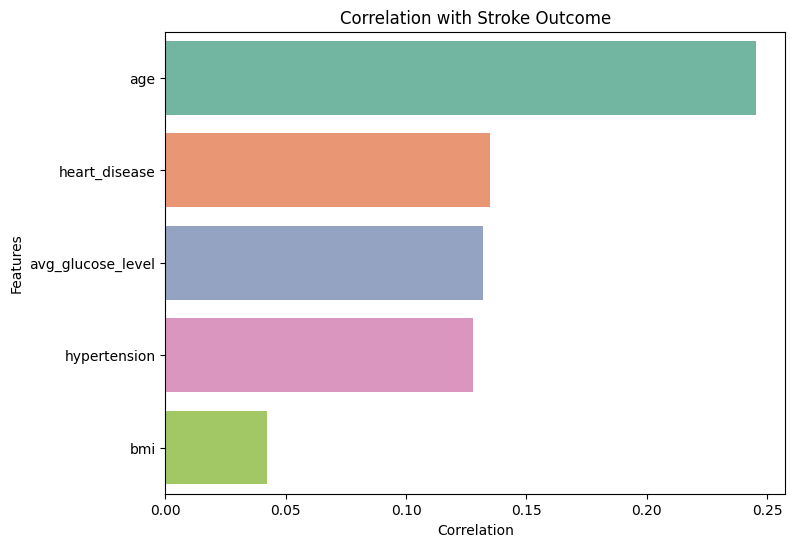

In [12]:
# Calculate the correlations with "stroke" outcome
rel_stroke = df_backup.corr()["stroke"].sort_values(ascending=False)

# Drop the "stroke" feature itself from rel_stroke
rel_stroke = rel_stroke.drop("stroke")

# Visualise the correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=rel_stroke.values, y=rel_stroke.index, palette="Set2")
plt.title("Correlation with Stroke Outcome")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

Cleaning done in other notebooks as slightly different approach for the two different models. 